In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [26]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv('LondonLimpio.csv')

# Ver tipos de variables
print("Tipos de variables:")
print(df.dtypes)

# Ver valores únicos por columna
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")  # Muestra los primeros 10 valores únicos


Tipos de variables:
Unnamed: 0                                        int64
last_scraped                                     object
source                                           object
host_name                                        object
host_since                                       object
host_location                                    object
host_is_superhost                                object
host_neighbourhood                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
property_type                                    object
room_type                                        object
has_availability                                 object
first_review                                     object
last_review                                      object
instant_bookable                                 object
id                          

In [27]:
df = df.select_dtypes(include=['int', 'float'])
df

,Unnamed: 0,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate,host_response_rate
0,0,5.622900e+04,216660,11.0,2.0,1.5,1.0,1.0,89.0,5.0,...,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000,0.950000,0.990000
1,1,6.297000e+04,336059,4.5,6.0,1.2,3.0,3.0,220.0,1.0,...,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000,1.000000,1.000000
2,2,6.394800e+04,216660,11.0,2.0,1.0,1.0,1.0,88.0,3.0,...,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000,0.950000,0.990000
3,3,6.677200e+04,216660,11.0,2.0,1.0,1.0,1.0,75.0,3.0,...,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000,0.950000,0.990000
4,4,6.919800e+04,345886,1.0,1.0,1.0,1.0,1.0,53.0,3.0,...,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000,0.821292,0.918403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,95139,1.307780e+18,445228166,1.0,5.0,1.2,2.0,2.0,236.0,2.0,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.821292,0.918403
95140,95140,1.307790e+18,50878819,2.0,2.0,1.0,1.0,2.0,88.0,5.0,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.900000,0.918403
95141,95141,1.307790e+18,131418248,4.5,6.0,1.2,1.0,1.0,93.0,1.0,...,4.794925,4.819357,4.73376,4.623557,2.8,0.0,0.4,1.015615,0.970000,1.000000
95142,95142,1.307790e+18,252350161,1.0,2.0,1.0,1.0,1.0,79.0,1.0,...,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615,0.821292,0.918403


In [32]:
variables_seleccionadas = [
    'accommodates',        # Capacidad de personas (impacta en demanda)
    'bathrooms',           # Número de baños (comodidad)
    'bedrooms',            # Número de habitaciones
    'price',               # Precio (variable clave)
    'minimum_nights',      # Política de estancia mínima
    'availability_365',    # Disponibilidad anual (inversa a la demanda)
    'number_of_reviews',   # Popularidad del alojamiento
    'review_scores_rating',# Calificación global (confianza)
    'calculated_host_listings_count', # Experiencia del anfitrión
    'reviews_per_month',   # Actividad reciente
    'host_response_rate',  # Tasa de respuesta (servicio)
    'host_acceptance_rate' # Tasa de aceptación (flexibilidad)
]

df = df[variables_seleccionadas]
df

,accommodates,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_rate,host_acceptance_rate
0,2.0,1.5,1.0,89.0,5.0,22,7.8,4.710000,11.0,0.840000,0.990000,0.950000
1,6.0,1.2,3.0,220.0,1.0,326,7.8,4.520000,1.0,1.050000,1.000000,1.000000
2,2.0,1.0,1.0,88.0,3.0,149,7.8,4.610000,11.0,1.060000,0.990000,0.950000
3,2.0,1.0,1.0,75.0,3.0,62,7.8,4.650000,11.0,1.100000,0.990000,0.950000
4,1.0,1.0,1.0,53.0,3.0,363,13.0,4.460000,1.0,0.090000,0.918403,0.821292
...,...,...,...,...,...,...,...,...,...,...,...,...
95139,5.0,1.2,2.0,236.0,2.0,300,0.0,4.694353,1.0,1.015615,0.918403,0.821292
95140,2.0,1.0,1.0,88.0,5.0,332,0.0,4.694353,1.0,1.015615,0.918403,0.900000
95141,6.0,1.2,1.0,93.0,1.0,3,0.0,4.694353,2.8,1.015615,1.000000,0.970000
95142,2.0,1.0,1.0,79.0,1.0,365,0.0,4.694353,1.0,1.015615,0.918403,0.821292


In [37]:
stats_df = pd.DataFrame({
    'Mínimo': df[variables_seleccionadas].min(),
    'Máximo': df[variables_seleccionadas].max(),
    'Promedio': df[variables_seleccionadas].mean()
})
stats_df

,Mínimo,Máximo,Promedio
accommodates,1.00,7.00,2.997036
bathrooms,0.50,1.50,1.179199
bedrooms,0.00,3.00,1.457476
price,1.00,360.00,163.003516
minimum_nights,1.00,8.00,2.489600
availability_365,0.00,365.00,135.791758
number_of_reviews,0.00,45.00,7.790749
review_scores_rating,4.29,5.00,4.786062
calculated_host_listings_count,1.00,16.00,2.825877
reviews_per_month,0.01,2.16,0.710909


In [33]:
corr_factors = df.corr()
corr_factors

,accommodates,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_rate,host_acceptance_rate
accommodates,1.000000,0.042550,0.590521,0.363550,0.117234,0.062710,0.031213,-0.023938,0.114014,0.028429,0.089992,0.122264
bathrooms,0.042550,1.000000,0.268197,0.384630,0.073005,-0.426430,-0.054428,0.023506,-0.136349,-0.211032,-0.301046,-0.211692
bedrooms,0.590521,0.268197,1.000000,0.414929,0.124613,-0.106997,-0.037135,0.019571,-0.025121,-0.047583,-0.066451,-0.041243
price,0.363550,0.384630,0.414929,1.000000,0.126531,-0.267653,-0.072937,0.022904,-0.053851,-0.139430,-0.229096,-0.095870
minimum_nights,0.117234,0.073005,0.124613,0.126531,1.000000,-0.099026,-0.016227,0.075539,-0.062864,-0.116405,-0.017767,-0.088224
availability_365,0.062710,-0.426430,-0.106997,-0.267653,-0.099026,1.000000,-0.003362,-0.071210,0.210605,0.189450,0.278111,0.198898
number_of_reviews,0.031213,-0.054428,-0.037135,-0.072937,-0.016227,-0.003362,1.000000,-0.003647,0.049973,0.047082,0.154796,0.127980
review_scores_rating,-0.023938,0.023506,0.019571,0.022904,0.075539,-0.071210,-0.003647,1.000000,-0.113134,-0.219447,0.031675,-0.066306
calculated_host_listings_count,0.114014,-0.136349,-0.025121,-0.053851,-0.062864,0.210605,0.049973,-0.113134,1.000000,0.113512,0.207181,0.240472
reviews_per_month,0.028429,-0.211032,-0.047583,-0.139430,-0.116405,0.189450,0.047082,-0.219447,0.113512,1.000000,0.190736,0.167406


In [34]:
corr_factors1 = abs(corr_factors)
corr_factors1

,accommodates,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_response_rate,host_acceptance_rate
accommodates,1.000000,0.042550,0.590521,0.363550,0.117234,0.062710,0.031213,0.023938,0.114014,0.028429,0.089992,0.122264
bathrooms,0.042550,1.000000,0.268197,0.384630,0.073005,0.426430,0.054428,0.023506,0.136349,0.211032,0.301046,0.211692
bedrooms,0.590521,0.268197,1.000000,0.414929,0.124613,0.106997,0.037135,0.019571,0.025121,0.047583,0.066451,0.041243
price,0.363550,0.384630,0.414929,1.000000,0.126531,0.267653,0.072937,0.022904,0.053851,0.139430,0.229096,0.095870
minimum_nights,0.117234,0.073005,0.124613,0.126531,1.000000,0.099026,0.016227,0.075539,0.062864,0.116405,0.017767,0.088224
availability_365,0.062710,0.426430,0.106997,0.267653,0.099026,1.000000,0.003362,0.071210,0.210605,0.189450,0.278111,0.198898
number_of_reviews,0.031213,0.054428,0.037135,0.072937,0.016227,0.003362,1.000000,0.003647,0.049973,0.047082,0.154796,0.127980
review_scores_rating,0.023938,0.023506,0.019571,0.022904,0.075539,0.071210,0.003647,1.000000,0.113134,0.219447,0.031675,0.066306
calculated_host_listings_count,0.114014,0.136349,0.025121,0.053851,0.062864,0.210605,0.049973,0.113134,1.000000,0.113512,0.207181,0.240472
reviews_per_month,0.028429,0.211032,0.047583,0.139430,0.116405,0.189450,0.047082,0.219447,0.113512,1.000000,0.190736,0.167406


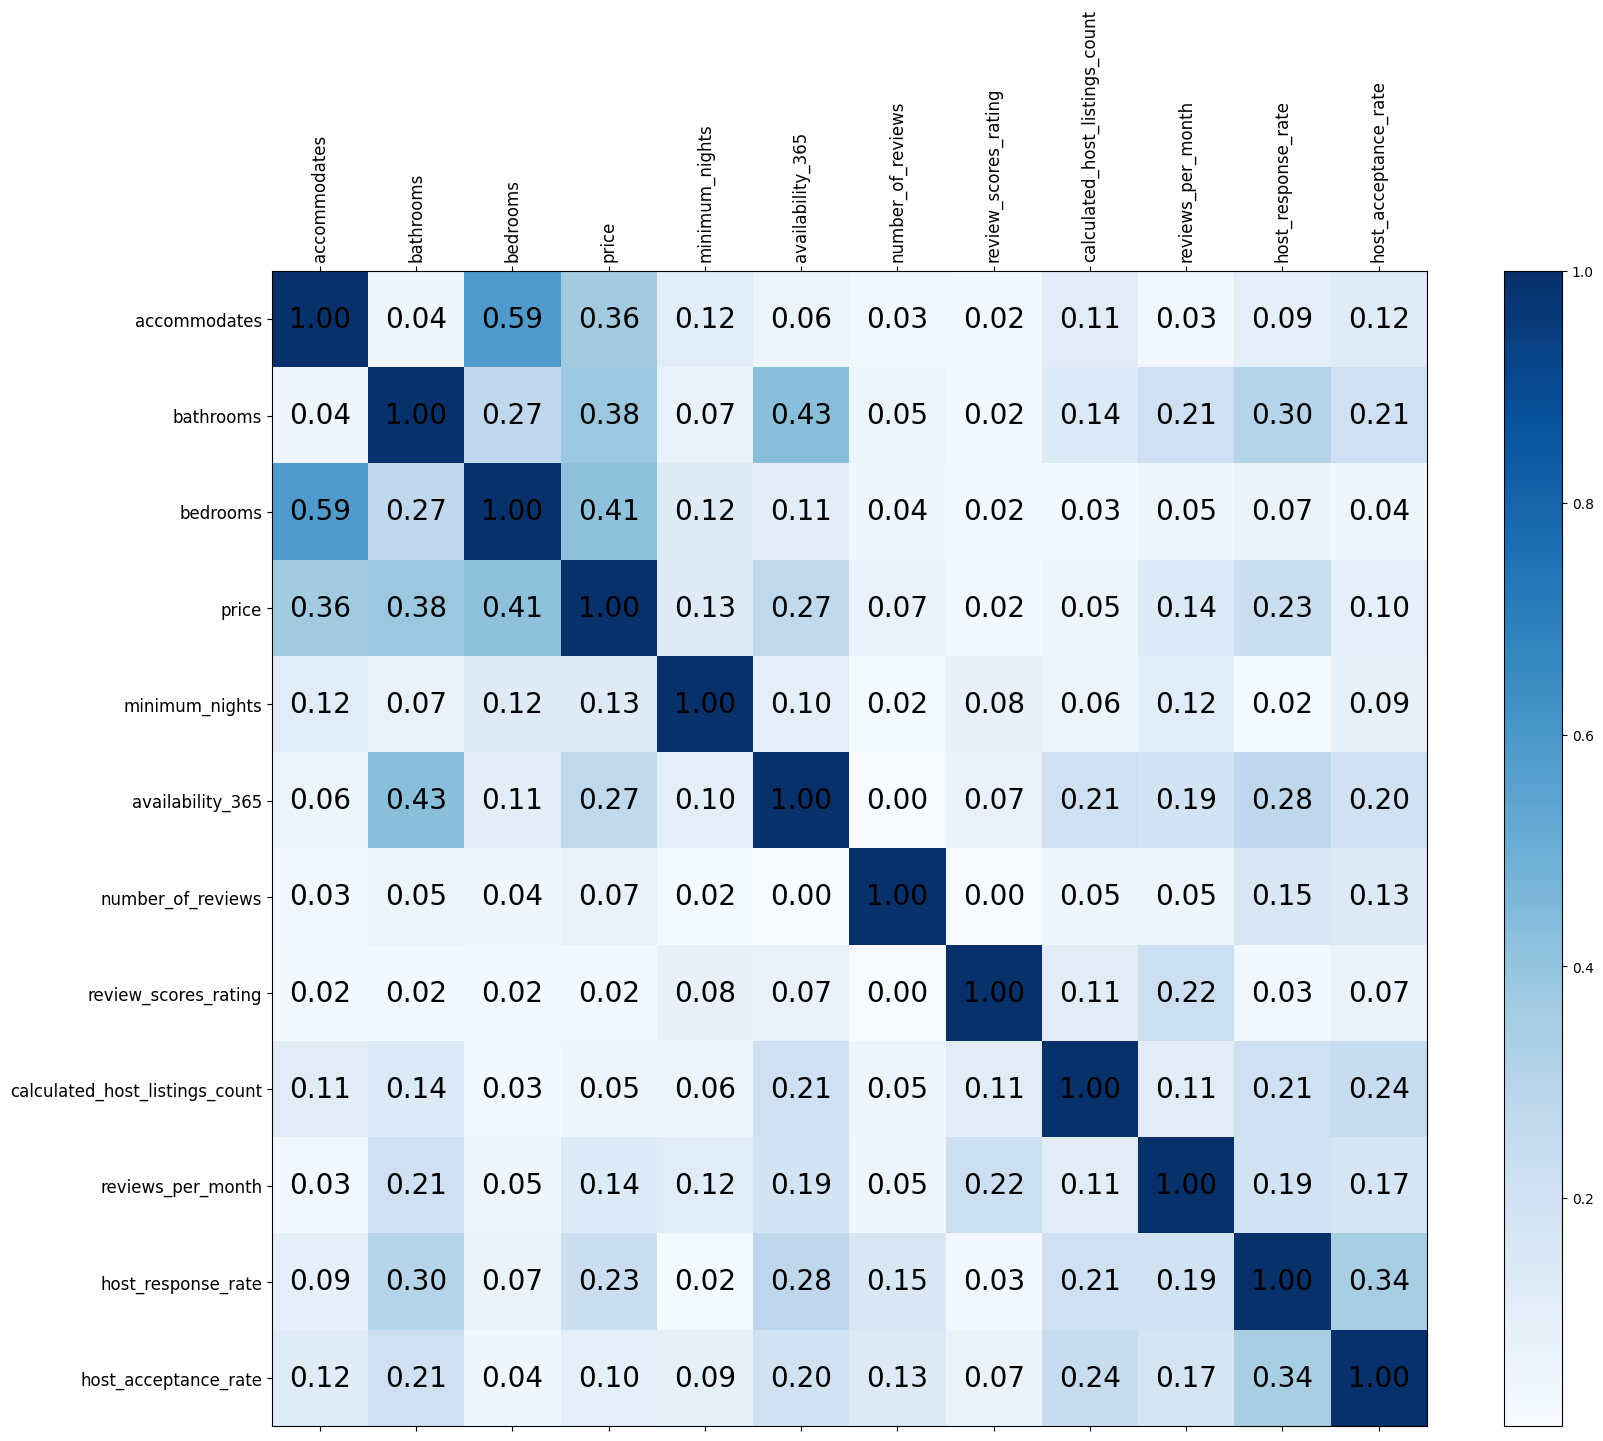

In [35]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_factors1, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors1.shape[0]):
    for j in range(corr_factors1.shape[1]):
        ax.text(j, i, f"{corr_factors1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors1.columns)), corr_factors1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors1.index)), corr_factors1.index, fontsize=12)
plt.savefig('General.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [ ]:
df1 = df.copy() 
df1['accommodates'] = np.where(df1['accommodates'] <= 3, 0, 1)

In [56]:
Vars_Indep = df1[['bedrooms','price','host_acceptance_rate']] #numérica
Var_Dep = df1['accommodates'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)


Precisión del modelo:
0.7987115732368897
Exactitud del modelo:
0.8257777466367713
Sensibilidad del modelo:
0.6888585632127888


In [ ]:
df2 = df.copy() 
df2['price'] = np.where(df2['price'] <= 163, 0, 1)

In [59]:
Vars_Indep = df2[['accommodates','bathrooms','bedrooms']] #numérica
Var_Dep = df2['price'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.7912565511951937
Exactitud del modelo:
0.7845781950672646
Sensibilidad del modelo:
0.8111118390879906


In [ ]:
df3 = df.copy() 
df3['bathrooms'] = np.where(df3['bathrooms'] <= 1, 0, 1)

In [61]:
Vars_Indep = df3[['price','accommodates','bedrooms']] #numérica
Var_Dep = df3['bathrooms'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.7793689464614654
Exactitud del modelo:
0.7693035313901345
Sensibilidad del modelo:
0.8203652739554665


In [62]:
df4 = df.copy() 
df4['bedrooms'] = np.where(df4['bedrooms'] <= 1, 0, 1)

Vars_Indep = df4[['accommodates','bathrooms','price']] #numérica
Var_Dep = df4['bedrooms'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.7363939786118112
Exactitud del modelo:
0.7647841928251121
Sensibilidad del modelo:
0.7917246429879166


In [82]:
df5 = df.copy() 
df5['minimum_nights'] = np.where(df5['minimum_nights'] <= 2, 0, 1)

Vars_Indep = df5[['accommodates','bedrooms','price']] #numérica
Var_Dep = df5['minimum_nights'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.5486216298091487
Exactitud del modelo:
0.5829246076233184
Sensibilidad del modelo:
0.2886745835657926


In [69]:
df6 = df.copy() 
df6['availability_365'] = np.where(df6['availability_365'] <= 135, 0, 1)

Vars_Indep = df6[['bathrooms','price','host_response_rate']] #numérica
Var_Dep = df6['availability_365'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.6290241448692153
Exactitud del modelo:
0.6729260089686099
Sensibilidad del modelo:
0.6043982600289995


In [78]:
df7 = df.copy() 
df7['number_of_reviews'] = np.where(df7['number_of_reviews'] <= 5, 0, 1)

Vars_Indep = df7[['host_response_rate','host_acceptance_rate','price']] #numérica
Var_Dep = df7['number_of_reviews'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.5689202371126285
Exactitud del modelo:
0.6051359304932735
Sensibilidad del modelo:
0.5784253890753738


In [74]:
df8 = df.copy() 
df8['host_acceptance_rate'] = np.where(df8['host_acceptance_rate'] <= 0.75, 0, 1)

Vars_Indep = df8[['host_response_rate','calculated_host_listings_count','availability_365']] #numérica
Var_Dep = df8['host_acceptance_rate'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.9369744955156951
Exactitud del modelo:
0.9369744955156951
Sensibilidad del modelo:
1.0


In [76]:
df9 = df.copy() 
df9['host_response_rate'] = np.where(df9['host_response_rate'] <= 0.95, 0, 1)

Vars_Indep = df9[['host_acceptance_rate','bathrooms','availability_365']] #numérica
Var_Dep = df9['host_response_rate'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.7707428444147455
Exactitud del modelo:
0.7640134529147982
Sensibilidad del modelo:
0.8408869987849332


In [77]:
df10 = df.copy() 
df10['reviews_per_month'] = np.where(df10['reviews_per_month'] <= 1, 0, 1)

Vars_Indep = df10[['review_scores_rating','bathrooms','availability_365']] #numérica
Var_Dep = df10['reviews_per_month'] #dicotómica

X = Vars_Indep
y = Var_Dep

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state =None)

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

#Emtrenamos el modelo
algoritmo.fit(X_train,y_train)
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

precision = precision_score(y_test,y_pred,average='binary') 
print('Precisión del modelo:')
print(precision)

exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

sensibilidad = recall_score(y_test,y_pred, average ='binary')
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.506268081002893
Exactitud del modelo:
0.6072379484304933
Sensibilidad del modelo:
0.27903268668615466
